<a href="https://colab.research.google.com/github/lucas-campos21/analise_exploratoria_northwind_traders/blob/main/credit_car_transactions_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/Credit card transactions - India - Simple.csv')

In [2]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [6]:
df['Gender'].value_counts()

,count
Gender,
F,13680
M,12372


In [14]:
men_grouped = df[df['Gender'] == 'M']
men_average_amount = men_grouped['Amount'].mean().round(2)
men_average_amount

np.float64(151109.15)

In [15]:
women_grouped = df[df['Gender'] == 'F']
women_average_amount = women_grouped['Amount'].mean().round(2)
women_average_amount

np.float64(161206.95)

In [17]:
#Who spends more, men or women?


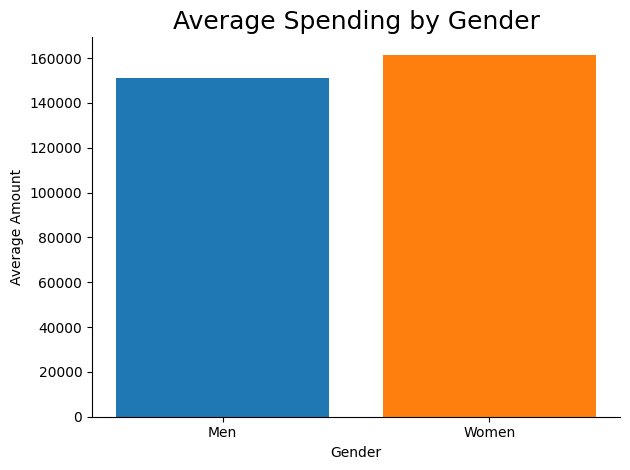

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
#Who spends more, men or women?
colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots()

ax.bar(['Men', 'Women'], [men_average_amount, women_average_amount], color=colors)

ax.set_xlabel('Gender')
ax.set_ylabel('Average Amount')
ax.set_title('Average Spending by Gender', fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


In [22]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [23]:
df['Exp Type'].unique()

array(['Bills', 'Food', 'Entertainment', 'Grocery', 'Fuel', 'Travel'],
      dtype=object)

In [35]:
biggest_expenses = df.groupby('Exp Type')['Amount'].sum().sort_values(ascending=False)

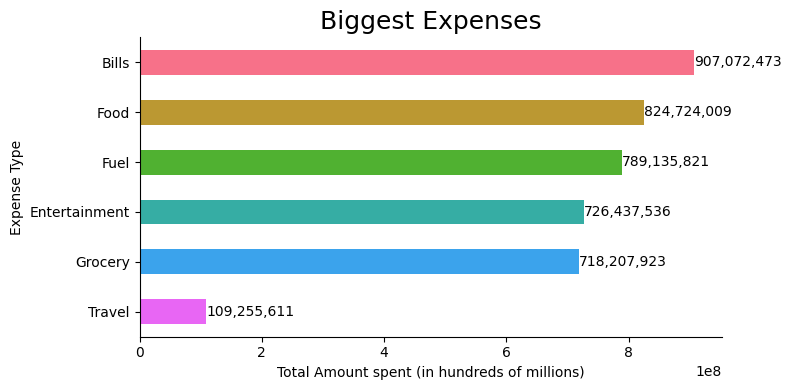

In [54]:
#The reason of the biggest expesnives
color = sns.color_palette('husl')

fig, ax = plt.subplots(figsize=(8,4))

biggest_expenses.plot(kind='barh',
                      ax=ax,
                      color=color)

ax.invert_yaxis()

for i, v in enumerate(biggest_expenses):
    ax.text(v + 0.02, i, f'{v:,.0f}', color='black', va='center')

ax.set_xlabel('Total Amount spent (in hundreds of millions)')
ax.set_ylabel('Expense Type')
ax.set_title('Biggest Expenses', fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [43]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [44]:
df['Card Type'].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

In [45]:
df['Card Type'].value_counts()

,count
Card Type,
Silver,6840
Signature,6447
Platinum,6398
Gold,6367


In [48]:
df[df['Card Type'] == 'Silver']['Amount'].sum()


np.int64(1069613713)

In [49]:
df[df['Card Type'] == 'Platinum']['Amount'].sum()


np.int64(1007639019)

In [51]:
df[df['Card Type'] == 'Gold']['Amount'].sum()


np.int64(984539536)

In [52]:
df[df['Card Type'] == 'Signature']['Amount'].sum()


np.int64(1013041105)

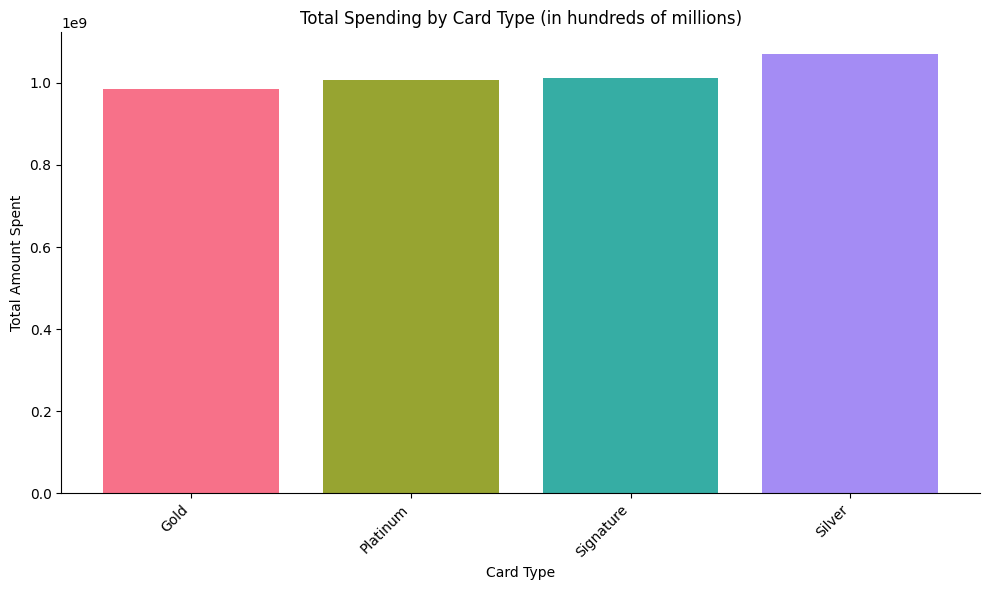

In [56]:
#The types of cards that spend the most amount of money

card_spending = df.groupby('Card Type')['Amount'].sum()


colors = sns.color_palette('husl', len(card_spending))


plt.figure(figsize=(10, 6))


plt.bar(card_spending.index, card_spending.values, color=colors)


plt.xlabel('Card Type')
plt.ylabel('Total Amount Spent')
plt.title('Total Spending by Card Type (in hundreds of millions)')

plt.xticks(rotation=45, ha='right')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.tight_layout()
plt.show()
